[<img align="right" src="../img/diff_robot_240.png" />](http://www.intechopen.com/books/advances-in-robot-navigation/conceptual-bases-of-robot-navigation-modeling-control-and-applications)
## Exercise: Robot Speed.

At the lowest level, we control the **angular** velocity of the right and left wheels $(\omega_r, \omega_l)$.

The relationship between the angular and **linear** velocity of the wheels is:

$$ V_r = \omega_r r$$

$$ V_l = \omega_l r $$

where $r$ is the radius of the wheel.

The linear and angular velocities **of the robot** can then be expressed by:

$$ V_{robot} = \frac{V_r + V_l}{2} $$

$$ \omega_{robot} = \frac{V_r - V_l}{L} $$

where $L$ is the distance between the wheels.

However, for programming the robot to move at a desired speed, we need to solve the **inverse problem**: given the linear and angular speed of the robot, determine the angular speed of each wheel.

#### Computing the speed of the wheels

Given the previous equations, we can solve them for the angular velocities of the wheels $(\omega_r, \omega_l)$:

$$ \omega_r = \frac{2 V_{robot} + L \omega_{robot}}{2 r}$$

$$ \omega_l = \frac{2 V_{robot} - L \omega_{robot}}{2 r}$$

Finally, you must implement the solution in a Python function that receives the robot velocities as arguments, computes the angular velocities of the wheels, and calls the motion function of the robot:

In [16]:
def move(V_robot, w_robot):
    r = 0.1953 / 2
    L = 0.33
    w_r = (2 * V_robot + L * w_robot) / (2*r)
    w_l = (2 * V_robot - L * w_robot) / (2*r)
    p3dx.move(w_l, w_r)

### Eight-shaped trajectory test

<img align="right" src="../img/eight_arrows.png" />
We are going to test the motion function with a eight-shaped trajectory. First, the robot will turn left at a constant linear and angular speed. After completing a circle, the robot will turn right at the same linear speed, with the oppposite angular speed. It will complete a second circle and return to the initial point, approximately.

For a given circle radius $R$, you can define different linear and angular velocities, as long as this relationship is held:

$$ V = \omega R$$

For example, you can choose:

$$ R = 1 m$$

$$ V = 0.35 m/s $$

For each circle, you can stop the robot after a timeout $T$:

$$ T = \frac{2 \pi R}{V} $$

<img align="right" src="../img/reload.png" />
#### Starting position
For a better visual understanding of the task, it is recommended that the robot starts at the center of the room. 

You can easily relocate the robot there by simply restarting the simulation, by clicking on the second icon of the button bar, as depicted in the figure.

#### Initialization
After restarting the simulation, the robot needs to be initialized.

In [17]:
import packages.initialization
import pioneer3dx as p3dx
import math
p3dx.init()

In [18]:
# First circle
R = 0.9
V = 0.35
w = V/R
T = (2*math.pi*R)/V
move(V,w)
p3dx.sleep(T)

# Second circle
move(V,-w)
p3dx.sleep(T)
# Stop the robot
move(0,0)

The trajectory can also be displayed:

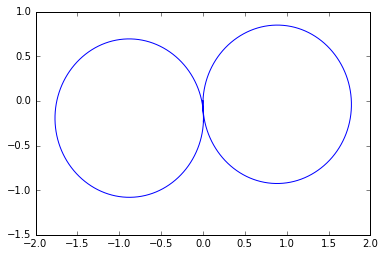

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
x, y = p3dx.trajectory()
plt.plot(x,y)

### Congratulations!

This was the last exercise of this week.

Please remember to save your work, since we well reuse some code of this week for the exercises in the following modules.